In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [4]:
file_path = r"C:\Users\wowbe\Python Codes Entri\Assignments\house_price.csv"
df = pd.read_csv(file_path)


In [6]:
# Perform basic EDA
print("Basic Information:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None

First 5 rows:
                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  

In [10]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


In [12]:
# Detect outliers using different methods
def detect_outliers_iqr(df, column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]


In [14]:
Q1 = np.percentile(df['price_per_sqft'], 25)
Q3 = np.percentile(df['price_per_sqft'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
df_cleaned = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]

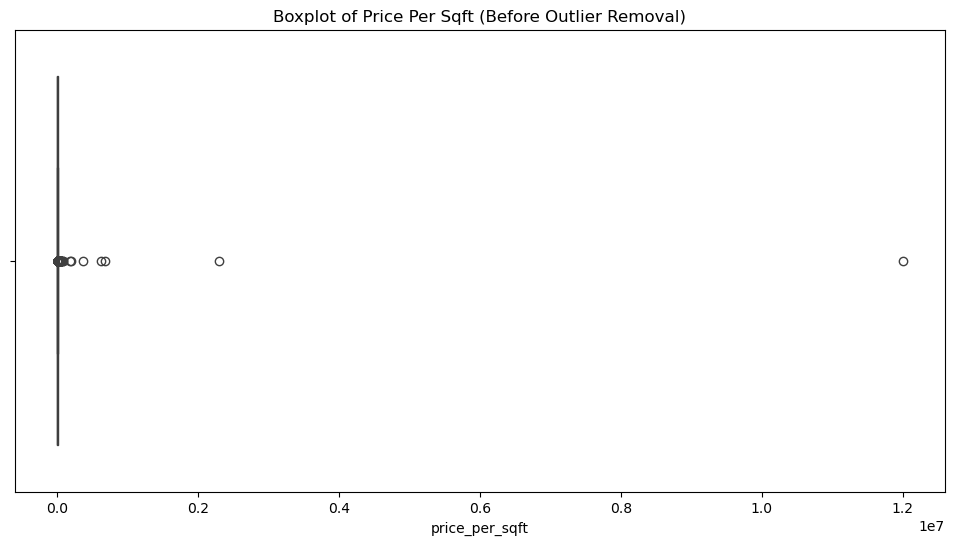

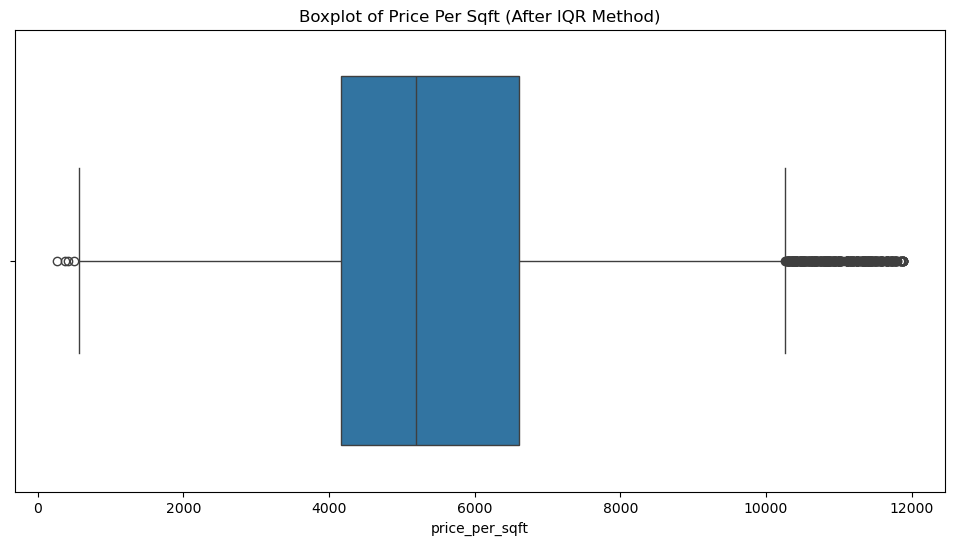

In [16]:
# Box plot comparison
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['price_per_sqft'])
plt.title("Boxplot of Price Per Sqft (Before Outlier Removal)")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df_cleaned['price_per_sqft'])
plt.title("Boxplot of Price Per Sqft (After IQR Method)")
plt.show()


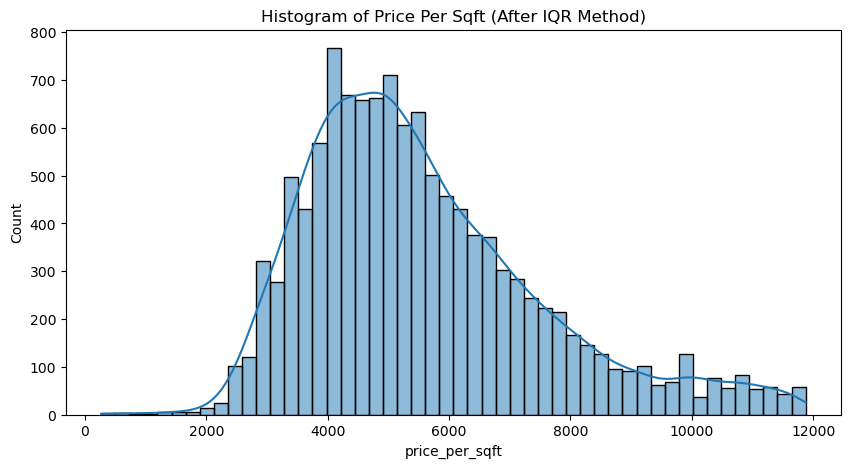

In [18]:
# Check normality using histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['price_per_sqft'], bins=50, kde=True)
plt.title("Histogram of Price Per Sqft (After IQR Method)")
plt.show()

In [20]:
# Check skewness and kurtosis
print("\nSkewness Before Transformation:", skew(df_cleaned['price_per_sqft']))
print("Kurtosis Before Transformation:", kurtosis(df_cleaned['price_per_sqft']))


Skewness Before Transformation: 0.9445732298531184
Kurtosis Before Transformation: 0.6784399584501744


In [22]:
# Apply log transformation
df_cleaned['price_per_sqft_log'] = np.log1p(df_cleaned['price_per_sqft'])

C:\Users\wowbe\AppData\Local\Temp\ipykernel_28364\3197965335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['price_per_sqft_log'] = np.log1p(df_cleaned['price_per_sqft'])


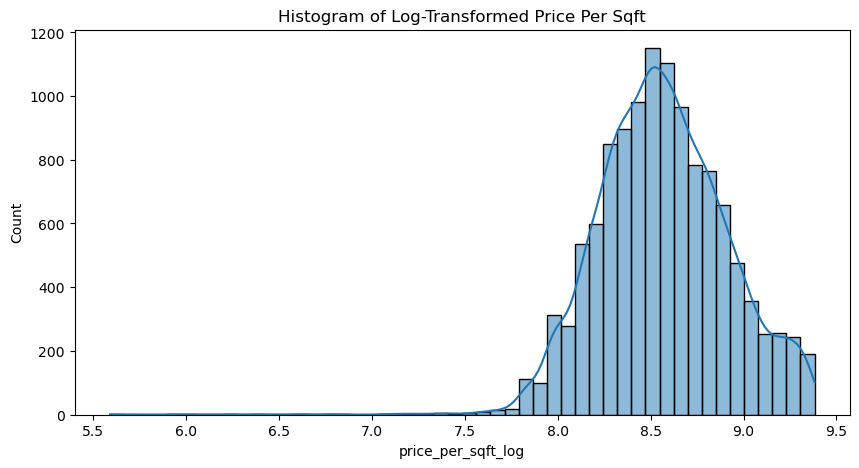

In [24]:
# Histogram after transformation
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['price_per_sqft_log'], bins=50, kde=True)
plt.title("Histogram of Log-Transformed Price Per Sqft")
plt.show()

In [26]:
# Check skewness and kurtosis after transformation
print("\nSkewness After Transformation:", skew(df_cleaned['price_per_sqft_log']))
print("Kurtosis After Transformation:", kurtosis(df_cleaned['price_per_sqft_log']))



Skewness After Transformation: -0.12988210833124453
Kurtosis After Transformation: 1.3369230684904956


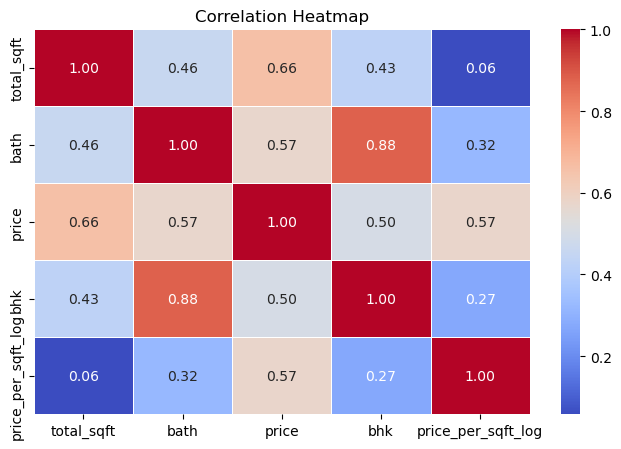

In [28]:
# Correlation heatmap
corr_matrix = df_cleaned[['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft_log']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

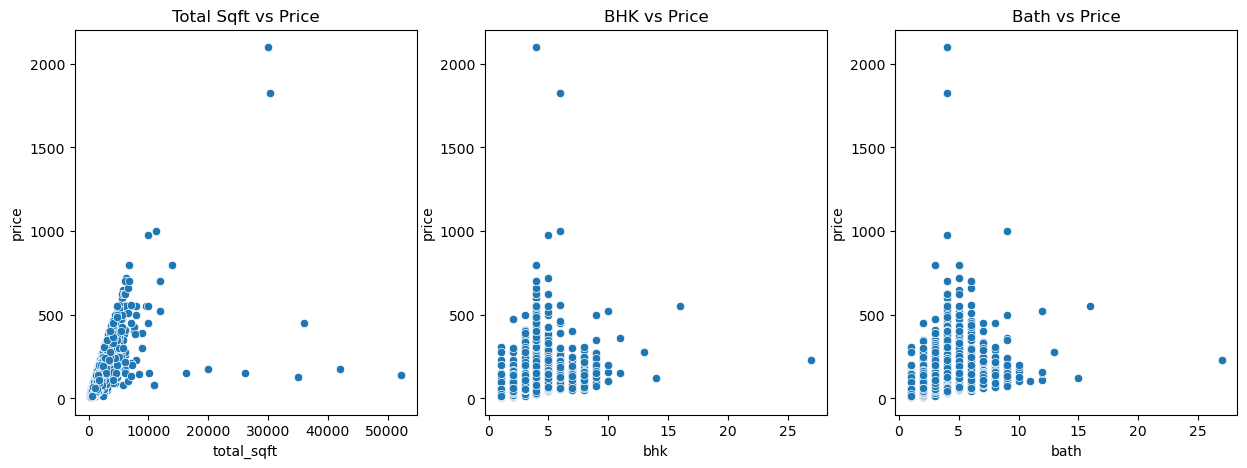

In [30]:
# Scatter plots to check correlations
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=df_cleaned['total_sqft'], y=df_cleaned['price'])
plt.title("Total Sqft vs Price")

plt.subplot(1, 3, 2)
sns.scatterplot(x=df_cleaned['bhk'], y=df_cleaned['price'])
plt.title("BHK vs Price")

plt.subplot(1, 3, 3)
sns.scatterplot(x=df_cleaned['bath'], y=df_cleaned['price'])
plt.title("Bath vs Price")

plt.show()
